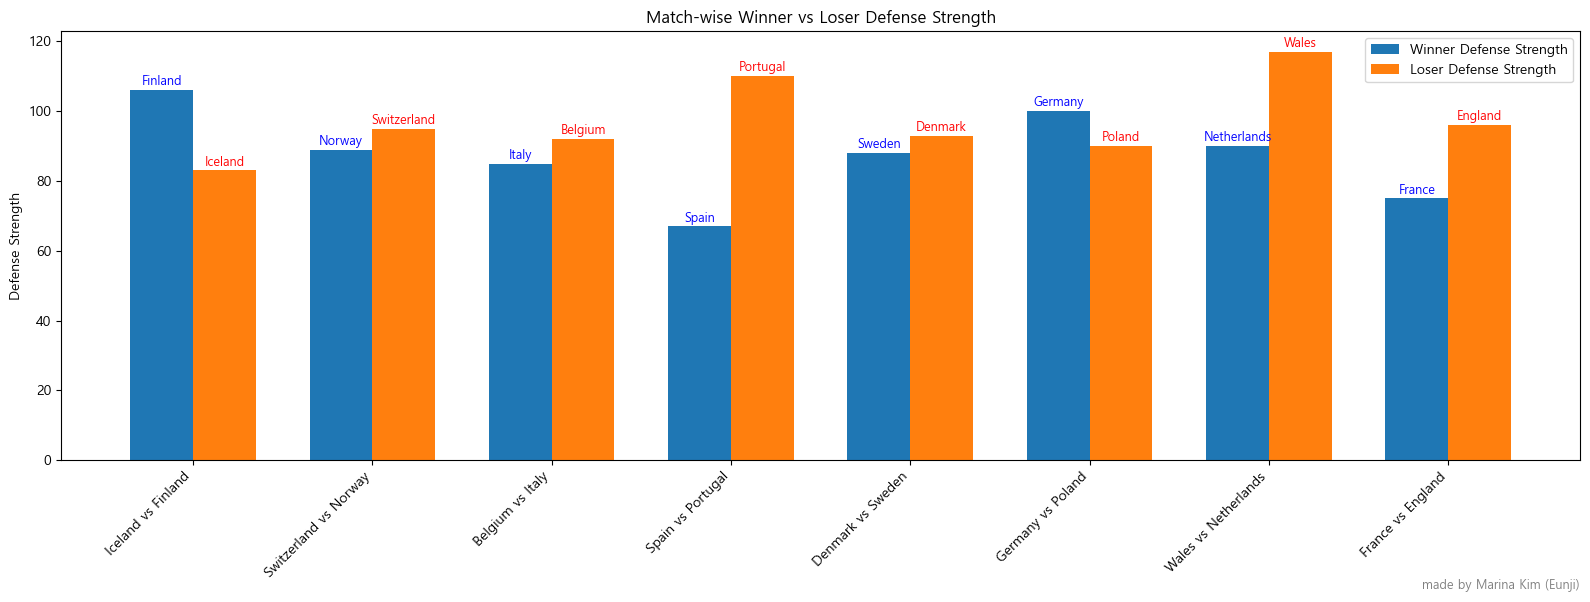

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("round1.csv")

def defense_strength(row, prefix):
    return row[f'{prefix}Tackles'] + row[f'{prefix}Clearances'] + row[f'{prefix}Interceptions']

results = []

for _, row in df.iterrows():
    if row['HomeGoals'] == row['AwayGoals']:
        continue
    
    if row['HomeGoals'] > row['AwayGoals']:
        winner_prefix = 'Home'
        loser_prefix = 'Away'
    else:
        winner_prefix = 'Away'
        loser_prefix = 'Home'
    
    winner_defense = defense_strength(row, winner_prefix)
    loser_defense = defense_strength(row, loser_prefix)
    
    results.append({
        'Match': f"{row['HomeTeam']} vs {row['AwayTeam']}",
        'Winner': row[f'{winner_prefix}Team'],
        'Loser': row[f'{loser_prefix}Team'],
        'Winner_Defense': winner_defense,
        'Loser_Defense': loser_defense
    })

match_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.35
indices = np.arange(len(match_df))

bars1 = ax.bar(indices - bar_width/2, match_df['Winner_Defense'], bar_width, label='Winner Defense Strength')
bars2 = ax.bar(indices + bar_width/2, match_df['Loser_Defense'], bar_width, label='Loser Defense Strength')

ax.set_xticks(indices)
ax.set_xticklabels(match_df['Match'], rotation=45, ha='right')
ax.set_ylabel('Defense Strength')
ax.set_title('Match-wise Winner vs Loser Defense Strength')
ax.legend()
plt.figtext(0.99, 0.01, "made by Marina Kim (Eunji)", horizontalalignment='right', fontsize=9, color='gray')


for i in range(len(match_df)):
    ax.text(i - bar_width/2, match_df.loc[i, 'Winner_Defense'] + 0.5, match_df.loc[i, 'Winner'], ha='center', va='bottom', fontsize=9, color='blue')
    ax.text(i + bar_width/2, match_df.loc[i, 'Loser_Defense'] + 0.5, match_df.loc[i, 'Loser'], ha='center', va='bottom', fontsize=9, color='red')

plt.savefig('defense.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


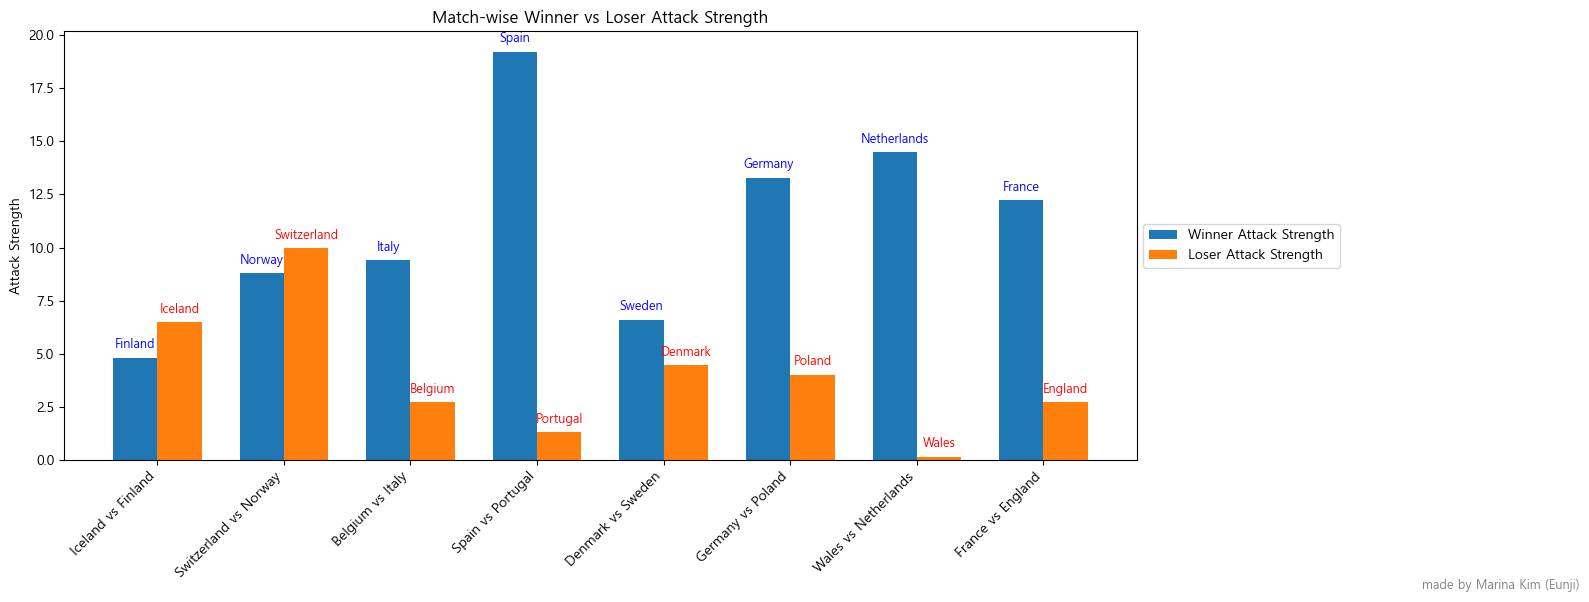

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def attack_strength(row, prefix):
    return row[f'{prefix}ShotsOnTarget'] + row[f'{prefix}xG'] + row[f'{prefix}BigChances']

results = []

for _, row in df.iterrows():
    if row['HomeGoals'] == row['AwayGoals']:
        continue 
    
    if row['HomeGoals'] > row['AwayGoals']:
        winner_prefix = 'Home'
        loser_prefix = 'Away'
    else:
        winner_prefix = 'Away'
        loser_prefix = 'Home'
    
    winner_attack = attack_strength(row, winner_prefix)
    loser_attack = attack_strength(row, loser_prefix)
    
    results.append({
        'Match': f"{row['HomeTeam']} vs {row['AwayTeam']}",
        'Winner': row[f'{winner_prefix}Team'],
        'Loser': row[f'{loser_prefix}Team'],
        'Winner_Attack': winner_attack,
        'Loser_Attack': loser_attack
    })

attack_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.35
indices = np.arange(len(attack_df))

bars1 = ax.bar(indices - bar_width/2, attack_df['Winner_Attack'], bar_width, label='Winner Attack Strength')
bars2 = ax.bar(indices + bar_width/2, attack_df['Loser_Attack'], bar_width, label='Loser Attack Strength')

ax.set_xticks(indices)
ax.set_xticklabels(attack_df['Match'], rotation=45, ha='right')
ax.set_ylabel('Attack Strength')
ax.set_title('Match-wise Winner vs Loser Attack Strength')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, 0.01, "made by Marina Kim (Eunji)", horizontalalignment='right', fontsize=9, color='gray')

plt.savefig('Attack.png', dpi=300, bbox_inches='tight')

for i in range(len(attack_df)):
    ax.text(i - bar_width/2, attack_df.loc[i, 'Winner_Attack'] + 0.3, attack_df.loc[i, 'Winner'], ha='center', va='bottom', fontsize=9, color='blue')
    ax.text(i + bar_width/2, attack_df.loc[i, 'Loser_Attack'] + 0.3, attack_df.loc[i, 'Loser'], ha='center', va='bottom', fontsize=9, color='red')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


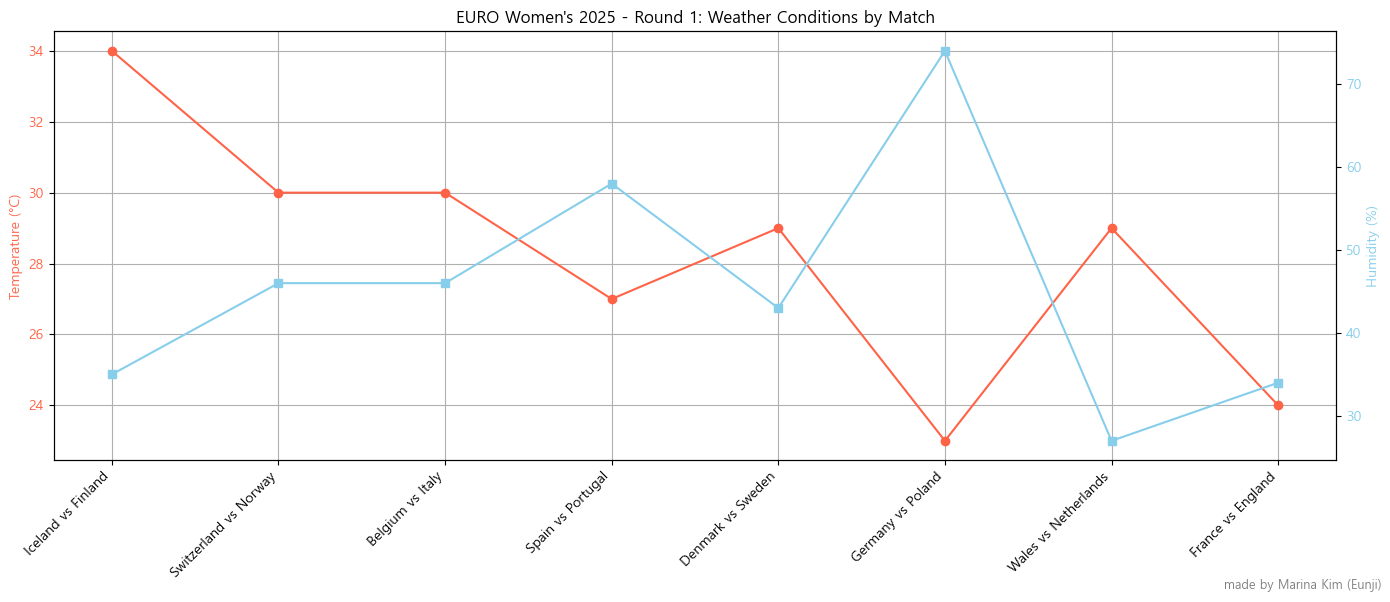

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

matches = [
    "Iceland vs Finland",
    "Switzerland vs Norway",
    "Belgium vs Italy",
    "Spain vs Portugal",
    "Denmark vs Sweden",
    "Germany vs Poland",
    "Wales vs Netherlands",
    "France vs England"
]

dates = ["02-Jul", "02-Jul", "03-Jul", "03-Jul", "04-Jul", "04-Jul", "05-Jul", "05-Jul"]
times = ["18:00", "21:00", "18:00", "21:00", "18:00", "21:00", "18:00", "21:00"]
temperature = [34, 30, 30, 27, 29, 23, 29, 24]
humidity = [35, 46, 46, 58, 43, 74, 27, 34]

df = pd.DataFrame({
    "Match": matches,
    "Date": dates,
    "Time": times,
    "Temperature (°C)": temperature,
    "Humidity (%)": humidity
})

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df["Match"], df["Temperature (°C)"], color='tomato', marker='o', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='tomato')
ax1.tick_params(axis='y', labelcolor='tomato')
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(df["Match"], df["Humidity (%)"], color='skyblue', marker='s', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

plt.figtext(0.99, 0.01, "made by Marina Kim (Eunji)", horizontalalignment='right', fontsize=9, color='gray')

plt.title("EURO Women's 2025 - Round 1: Weather Conditions by Match")
ax1.grid(True)
fig.tight_layout()
plt.savefig('weather_codition.png', dpi=300, bbox_inches='tight')

plt.show()
